In [1]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import hashlib

In [4]:
def encode(img_path, wm_path, res_path, alpha):
    img = cv2.imread(img_path)
    img_f = np.fft.fft2(img)
    height, width, channel = np.shape(img)
    watermark = cv2.imread(wm_path)
    wm_height, wm_width = watermark.shape[0], watermark.shape[1]
    
    if wm_height < height or wm_width < width:
    # 如果水印图像的形状小于频域数据的形状，使用 numpy.resize() 进行拉伸
        watermark = np.resize(watermark, (height, width))
    elif wm_height > height or wm_width > width:
    # 如果水印图像的形状大于频域数据的形状，使用 numpy.pad() 进行填充
        top = (wm_height - height) // 2
        left = (wm_width - width) // 2
        watermark = watermark[top:top+height, left:left+width]
    else:
    # 如果水印图像的形状和频域数据的形状相同，不需要进行调整
        pass

    x, y = list(range(int(height / 2))), list(range(width))
    random.seed(height + width)
    random.shuffle(x)
    random.shuffle(y)
    tmp = np.zeros(img.shape)
    for i in range(int(height / 2)):
        for j in range(width): 

            if x[i] < wm_height and y[j] < wm_width:
                tmp[i][j] = watermark[x[i]][y[j]]
                tmp[height - 1 - i][width - 1 - j] = tmp[i][j]
    res_f = img_f + alpha * tmp
    res = np.fft.ifft2(res_f)
    res = np.real(res)
    cv2.imwrite(res_path, res,[int(cv2.IMWRITE_JPEG_QUALITY), 100])

In [3]:
def decode(ori_path, img_path, res_path, alpha):
    ori = cv2.imread(ori_path)
    img = cv2.imread(img_path)
    height, width, channel = np.shape(img)
    wm_height, wm_width = ori.shape[0], ori.shape[1]
    
    if wm_height < height or wm_width < width:
    # 如果水印图像的形状小于频域数据的形状，使用 numpy.resize() 进行拉伸
        ori = np.resize(ori, (height, width,channel))
    elif wm_height > height or wm_width > width:
    # 如果水印图像的形状大于频域数据的形状，使用 numpy.pad() 进行填充
        top = (wm_height - height) // 2
        left = (wm_width - width) // 2
        ori = ori[top:top+height, left:left+width]
    else:
    # 如果水印图像的形状和频域数据的形状相同，不需要进行调整
        pass
    
    ori_f = np.fft.fft2(ori)
    img_f = np.fft.fft2(img)
    height, width = ori.shape[0], ori.shape[1]
    watermark = (ori_f - img_f) / alpha
    watermark = np.real(watermark)
    res = np.zeros(watermark.shape)
    random.seed(height + width)
    x = list(range(int(height / 2)))
    #x = list(range(int(height)))
    y = list(range(width))
    random.shuffle(x)
    random.shuffle(y)
    for i in range(int(height / 2)):
        for j in range(width):
            res[x[i]][y[j]] = watermark[i][j]
    cv2.imwrite(res_path, res, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

7eb087e95061860ec77bdfdc64f190b6


(<matplotlib.image.AxesImage at 0x1d0a8a25e50>, None)

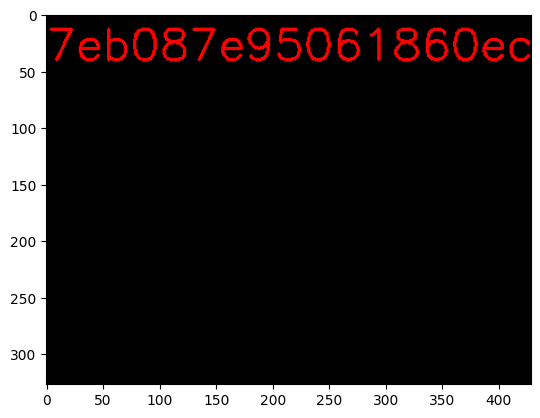

In [2]:
gray_img = cv2.imread('text.jpg')
watermark = np.zeros(gray_img.shape, np.uint8)
cv2.putText(watermark, hashlib.md5('孟令飞'.encode()).hexdigest(), (0,40), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (255), 2)
cv2.imwrite('My_Watermark.jpg',watermark)
plt.imshow(watermark),print(hashlib.md5('孟令飞'.encode()).hexdigest())

In [5]:
a = 'ori.jpg'
b = "My_Watermark.jpg"  #水印图片formal/2023-04-20 140536.png
c = "res.jpg"
encode(a,b,c,15)

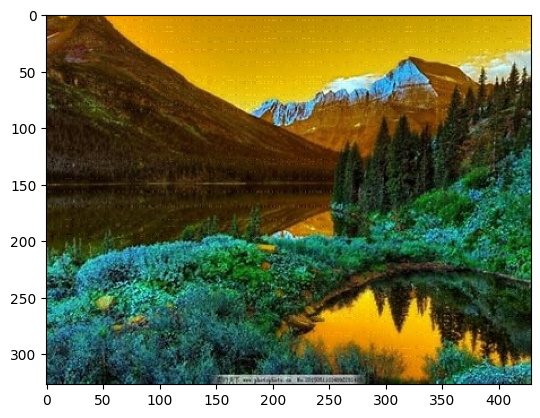

In [7]:
img_1 = cv2.imread("res.jpg")
plt.imshow(img_1) #不同库之间RGB顺序不一样，导致出现颜色不同

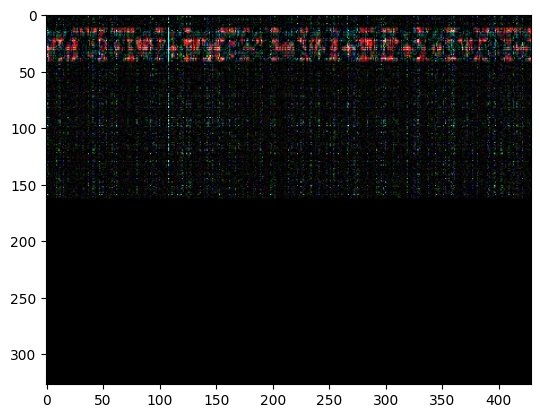

In [14]:
a=decode("ori.jpg","res.jpg",'A.jpg',1)
a = cv2.imread("A.jpg")
plt.imshow(a)

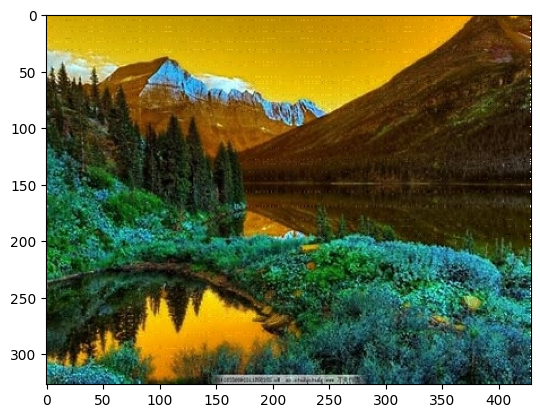

In [11]:
image = cv2.imread("res.jpg")
flipped = cv2.flip(image,1)
cv2.imwrite("Flipped.jpg", flipped)
plt.imshow(flipped)

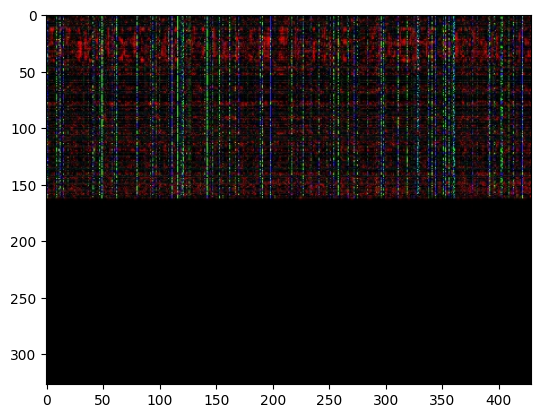

In [15]:
b=decode("ori.jpg","Flipped.jpg",'B.jpg',5)
b = cv2.imread("B.jpg")
plt.imshow(b)

In [17]:

def sp_noise(image,prob=0.05):
    image= cv2.imread(image)
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    plt.imshow(output)
    cv2.imwrite("output.jpg", output)      
    return output

array([[[ 95,  58,   8],
        [ 88,  51,   1],
        [ 87,  51,   3],
        ...,
        [215, 173,   7],
        [217, 175,   9],
        [219, 177,  10]],

       [[ 95,  55,   6],
        [ 89,  52,   2],
        [ 93,  55,   7],
        ...,
        [214, 172,   6],
        [217, 175,   9],
        [219, 177,  10]],

       [[ 98,  58,   6],
        [ 94,  54,   2],
        [ 92,  52,   3],
        ...,
        [213, 171,   4],
        [217, 175,   8],
        [255, 255, 255]],

       ...,

       [[ 66, 112, 123],
        [ 62, 108, 119],
        [ 49,  91, 103],
        ...,
        [ 66, 117,  90],
        [ 66, 121,  94],
        [ 80, 136, 107]],

       [[ 30,  78,  90],
        [ 25,  70,  83],
        [ 33,  78,  89],
        ...,
        [ 74, 122,  94],
        [ 74, 125,  97],
        [ 71, 125,  95]],

       [[ 41,  89, 101],
        [ 14,  59,  72],
        [ 35,  79,  92],
        ...,
        [ 81, 126, 100],
        [ 69, 117,  89],
        [ 65, 117,  87]]

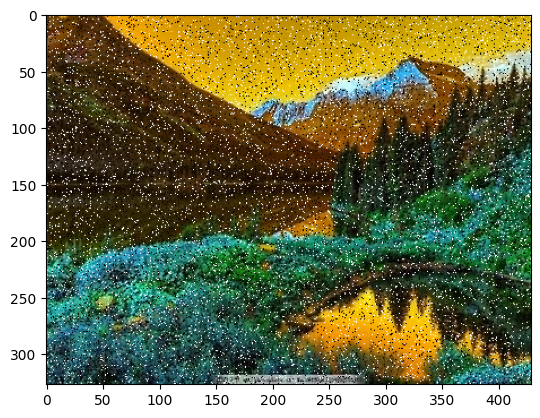

In [18]:
sp_noise('text.jpg')

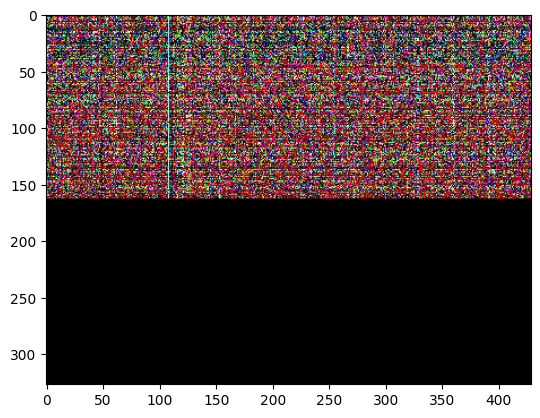

In [22]:
c=decode("ori.jpg","output.jpg",'C.jpg',1)
c = cv2.imread("C.jpg")
plt.imshow(c)